# Vehicle Detection

## 1.) Detection Only

## Importing Necessary Libraries

In [33]:
import numpy as np
import cv2
import PIL.Image
from IPython.display import display, clear_output
from time import sleep

## Input Video

In [34]:
import cv2
from IPython.display import display, clear_output
import PIL.Image

# Initialize video capture
video_path = 'traffic.avi'
video = cv2.VideoCapture(video_path)


## Preprocessing

### Background Subtractor

### Applying Morphological Operation

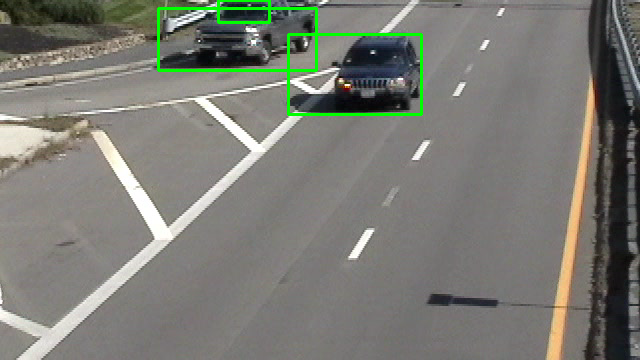

In [35]:
# Initialize background subtractor
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

# Train the background subtractor
for _ in range(50):
    ret, frame = video.read()
    fgmask = fgbg.apply(frame)
while True:
    ret, frame = video.read()
    if not ret:
        break

    # Apply background subtraction
    fgmask = fgbg.apply(frame)
# Perform morphological opening to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area
    min_blob_area = 150
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_blob_area]

    # Draw bounding boxes around detected objects
    for cnt in filtered_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Convert frame to RGB for display in notebook
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_pil = PIL.Image.fromarray(frame_rgb)
    display(frame_pil)
    
    # Clear previous output for smooth animation
    clear_output(wait=True)
# Release video capture
video.release()




# 2.) Traffic detection 

## Initialisation

In [38]:
min_width = 80  # Minimum width of the rectangle
min_height = 80  # Minimum height of the rectangle

offset = 6  # Allowed error between pixels

line_pos = 550  # Position of the counting line

fps = 60  # Video FPS

detection = []
cars_count = 0
threshold_limit = 40  # Threshold limit for car count

def get_center(x, y, w, h):
    x1 = int(w / 2)
    y1 = int(h / 2)
    cx = x + x1
    cy = y + y1
    return cx, cy

cap = cv2.VideoCapture('video_3.mp4')

## Morphological Operations

In [39]:
background_subtractor = cv2.bgsegm.createBackgroundSubtractorMOG()

while True:
    ret, frame1 = cap.read()
    time = float(1 / fps)
    sleep(time)
    grey = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey, (3, 3), 5)
    img_sub = background_subtractor.apply(blur)
    dilate = cv2.dilate(img_sub, np.ones((5, 5)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    dilated = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel)
    dilated = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
    
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cv2.line(frame1, (25, line_pos), (1200, line_pos), (255, 127, 0), 3)
    for (i, c) in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(c)
        valid_contour = (w >= min_width) and (h >= min_height)
        if not valid_contour:
            continue

        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
        center = get_center(x, y, w, h)
        detection.append(center)
        cv2.circle(frame1, center, 4, (0, 0, 255), -1)

        for (x, y) in detection:
            if y < (line_pos + offset) and y > (line_pos - offset):
                cars_count += 1
                cv2.line(frame1, (25, line_pos), (1200, line_pos), (0, 127, 255), 3)
                detection.remove((x, y))
                print("Car is detected: " + str(cars_count))
                  # Check if car count exceeds the threshold limit
        if cars_count > threshold_limit:
            print("Traffic area")
            break
        cv2.putText(frame1, "VEHICLE COUNT: " + str(cars_count), (450, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5)
    cv2.imshow("Original Video", frame1)
    cv2.imshow("Detection", dilated)

    if cv2.waitKey(1) == 27 or cars_count > threshold_limit:
        break

Car is detected: 1
Car is detected: 2
Car is detected: 3
Car is detected: 4
Car is detected: 5
Car is detected: 6
Car is detected: 7
Car is detected: 8
Car is detected: 9
Car is detected: 10
Car is detected: 11
Car is detected: 12
Car is detected: 13
Car is detected: 14
Car is detected: 15
Car is detected: 16
Car is detected: 17
Car is detected: 18
Car is detected: 19
Car is detected: 20
Car is detected: 21
Car is detected: 22
Car is detected: 23
Car is detected: 24
Car is detected: 25
Car is detected: 26
Car is detected: 27
Car is detected: 28
Car is detected: 29
Car is detected: 30
Car is detected: 31
Car is detected: 32
Car is detected: 33
Car is detected: 34
Car is detected: 35
Car is detected: 36
Car is detected: 37
Car is detected: 38
Car is detected: 39
Car is detected: 40
Car is detected: 41
Traffic area


# 3.) Vehicle Detection

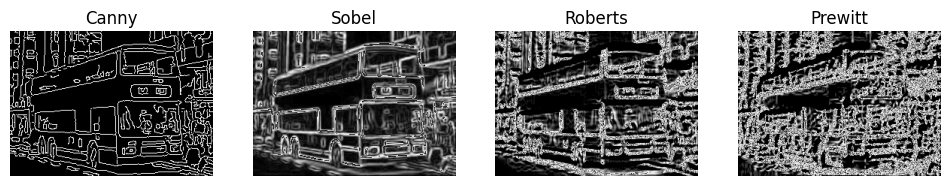

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def edge_detection(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Apply Canny edge detection
    canny_edges = cv2.Canny(blurred, 30, 90)  # Adjust threshold values as needed

    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)
    sobel_edges = np.uint8(sobel_edges)

    # Apply Roberts Cross edge detection
    roberts_x = cv2.filter2D(blurred, -1, np.array([[-1, 0], [0, 1]]))
    roberts_y = cv2.filter2D(blurred, -1, np.array([[0, -1], [1, 0]]))
    roberts_edges = np.sqrt(roberts_x**2 + roberts_y**2)
    roberts_edges = np.uint8(roberts_edges)

    # Apply Prewitt edge detection
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewitt_x = cv2.filter2D(blurred, -1, kernel_x)
    prewitt_y = cv2.filter2D(blurred, -1, kernel_y)
    prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)
    prewitt_edges = np.uint8(prewitt_edges)

    return canny_edges, sobel_edges, roberts_edges, prewitt_edges

# Example usage:
image = cv2.imread('truck.png')

# Perform edge detection
canny_edges, sobel_edges, roberts_edges, prewitt_edges = edge_detection(image)

# Display the individual edge detection results
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt')
plt.axis('o')

plt.show()


In [37]:
import cv2
import numpy as np

def vehicle_detection(input_path):
    # Check if input is an image or a video
    is_video = input_path.endswith('.mp4') or input_path.endswith('.avi')

    if is_video:
        # Initialize video capture
        cap = cv2.VideoCapture(input_path)
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            # Process the frame
            processed_frame = process_frame(frame)
            # Display the processed frame
            cv2.imshow('Processed Frame', processed_frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()
    else:
        # Read the image
        image = cv2.imread(input_path)
        # Process the image
        processed_image = process_frame(image)
        # Display the processed image
        cv2.imshow('Processed Image', processed_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

def process_frame(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Grayscale', gray)
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 30, 90)
    cv2.imshow('Canny Edges', edges)
    # Perform morphological operations (closing, erosion, and dilation)
    kernel = np.ones((5, 5), np.uint8)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    edges = cv2.erode(edges, kernel, iterations=1)
    edges = cv2.dilate(edges, kernel, iterations=1)
    cv2.imshow('Morphological Operations', edges)
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw bounding boxes on the original frame
    vehicle_frame = frame.copy()
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 1000:  # Filter out small contours (adjust threshold as needed)
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(vehicle_frame, (x, y), (x + w, y + h), (0, 255, 0), 3)  # Draw bounding box
    cv2.imshow('Vehicle Detection', vehicle_frame)
    return vehicle_frame

# Example usage:
input_path = 'yo.png'  # Change this to your input file path
vehicle_detection(input_path)
